In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Contours

Introduction - https://docs.opencv.org/trunk/d4/d73/tutorial_py_contours_begin.html

cv2.findContours - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#findcontours


cv2.drawContours - https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#drawcontours



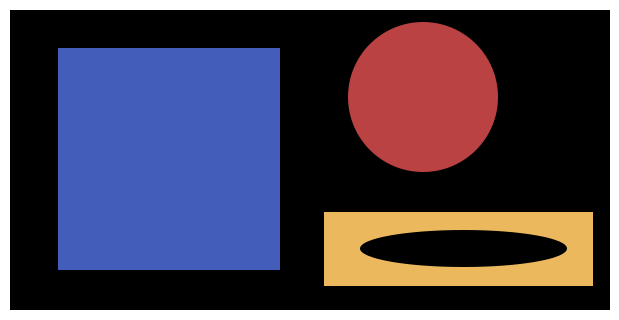

In [2]:
image = cv2.imread("images/basic_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)

3
4


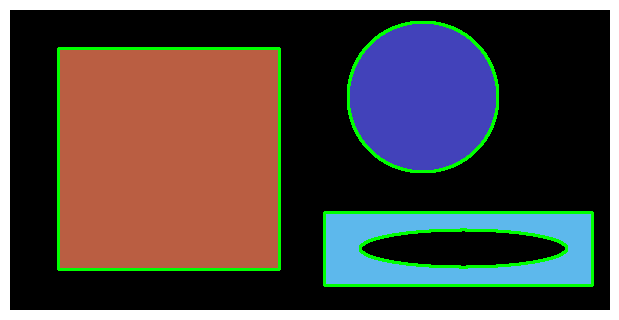

In [10]:
# find contours
contours = cv2.findContours(
    image=gray.copy(), 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)
contours = imutils.grab_contours(contours)
clone = image.copy()
print(len(contours))


# draw contours
cv2.drawContours(
    image=clone, 
    contours=contours, 
    contourIdx=-1, 
    color=(0, 255, 0), 
    thickness=2
)

display(clone, flip=False, cmap="gray")

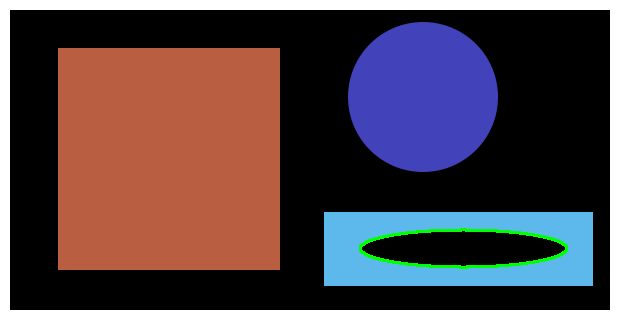

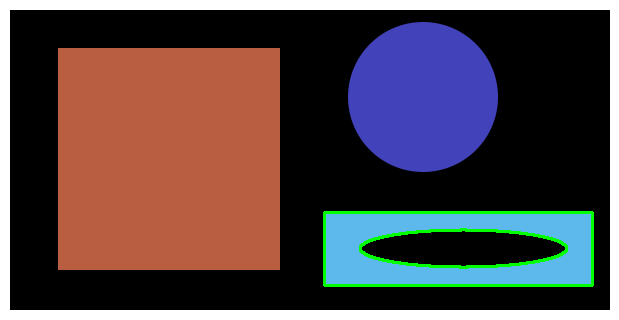

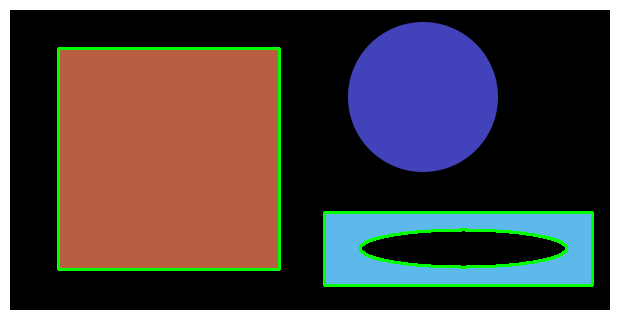

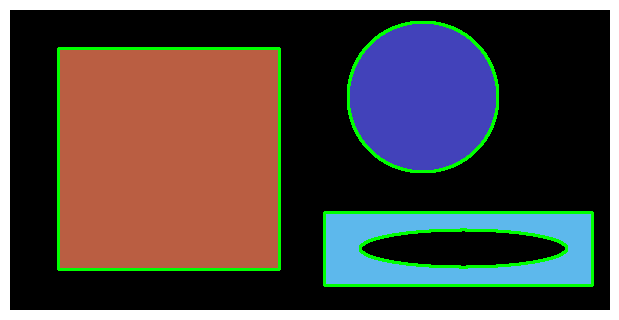

In [17]:
# drawing contours such that it will not draw one for the oval shape inside rectangle 
clone = image.copy()
for i, c in enumerate(contours):
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    display(clone, flip=False, cmap="gray")

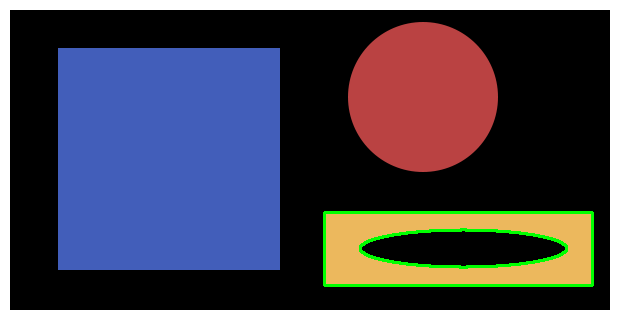

In [36]:
clone = image.copy()

# more pythonic way of doing above
cv2.drawContours(clone, list(contours[:2]), -1, (0, 255, 0), 2)
display(clone)

3


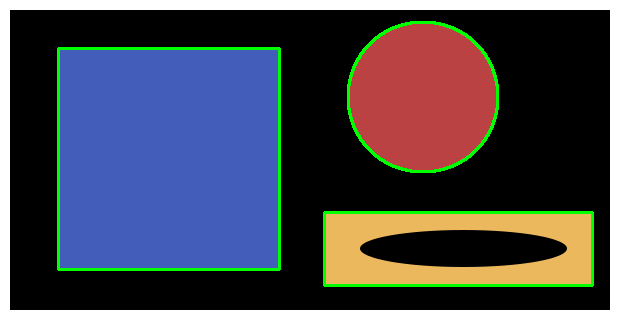

In [40]:
# find contours only for the outer regions of the rectangle

clone = image.copy()

contours = cv2.findContours(image=gray.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(len(contours))
cv2.drawContours(clone, contours, -1, (0, 255, 0), 2)
display(clone)

### Using Masks and Contours Together

3


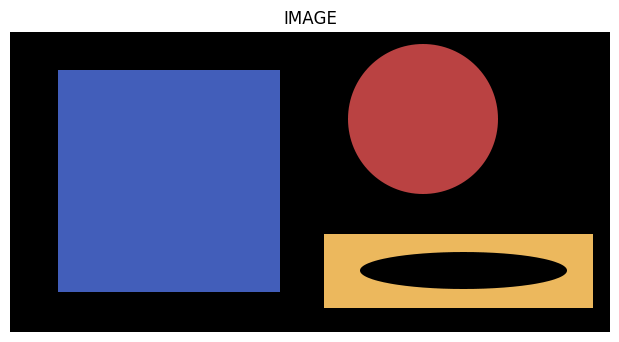

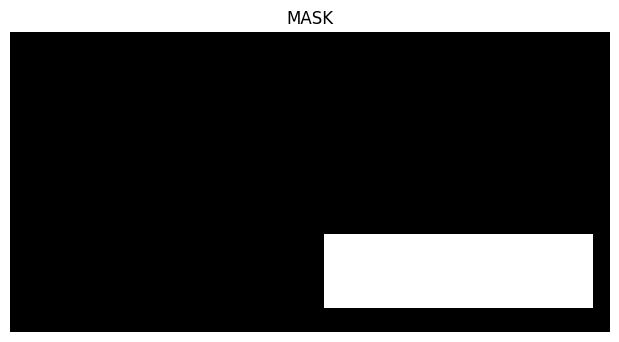

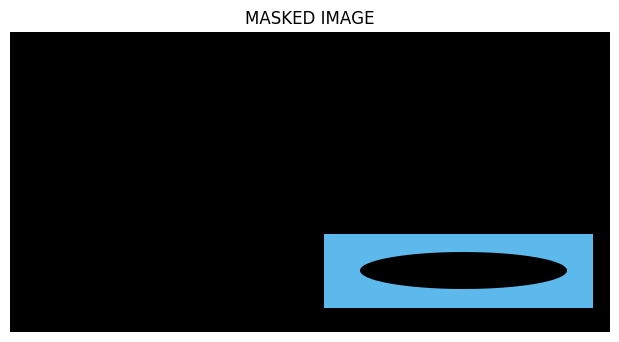

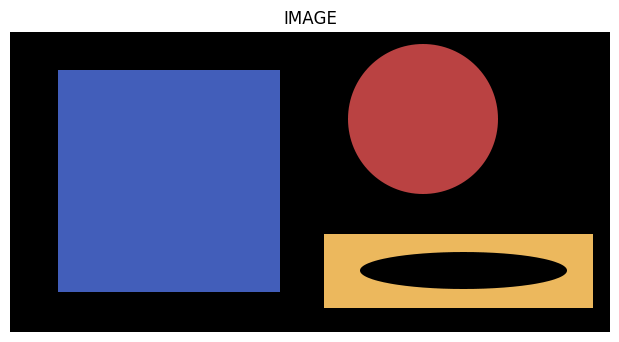

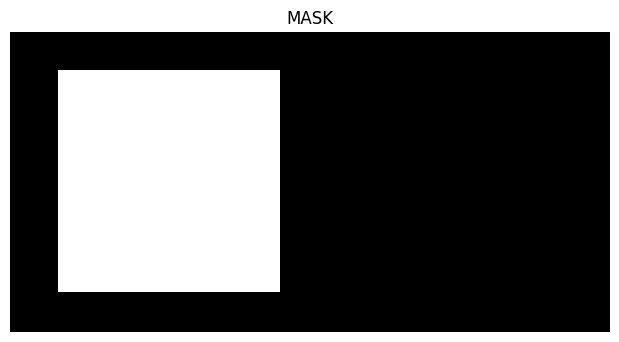

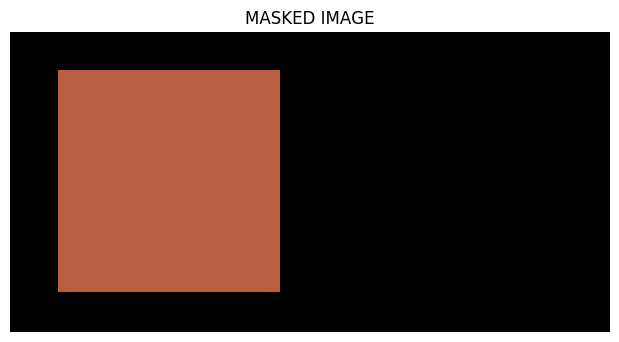

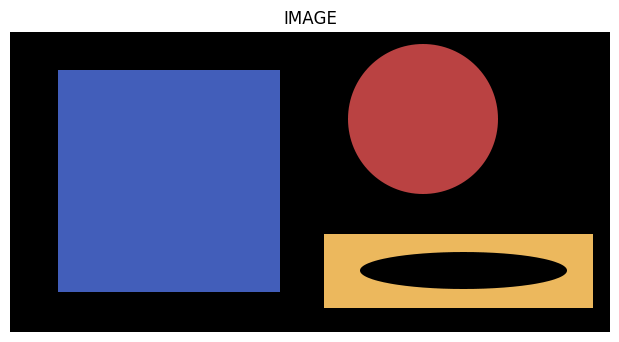

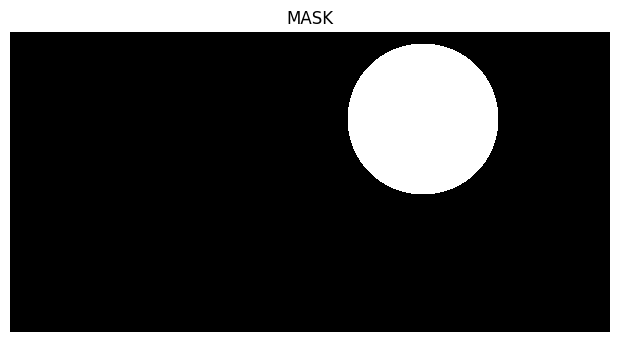

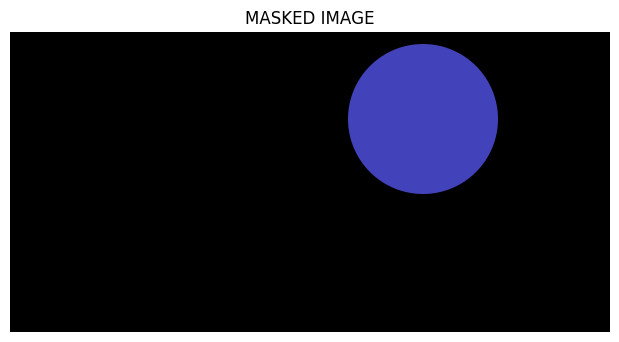

In [42]:
clone = image.copy()

contours = cv2.findContours(image=gray.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print(len(contours))

for c in contours:
    
    # construct mask 
    mask = np.zeros(gray.shape, dtype="uint8")
    
    # draw contours on mask
    cv2.drawContours(
        image=mask, 
        contours=[c], 
        contourIdx=-1,
        color=255, # indicating that we want to draw white
        thickness=-1 # indicating to fill the shape
    )
    
    # show
    display(image, title="IMAGE")
    display(mask, flip=False, cmap="gray", title="MASK")
    
    # masked - image + mask
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    display(masked_image, flip=False, cmap="gray", title="MASKED IMAGE")